In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## a)

In [204]:
#read in red wine dataset
rawdata = pd.read_csv("~/Downloads/wine+quality/winequality-red.csv", sep = ";")

In [205]:
r = np.array(rawdata)

In [206]:
r

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [209]:
scaler = MinMaxScaler()

## b)

In [231]:
#split dataset intro training, test, validation
X = r[:, :-1]
y = r[:,-1]

#scale data
scaler.fit(X)
X = scaler.transform(X)


In [232]:
X_2, X_test, y_2, y_test = train_test_split(X, y , test_size=0.2, random_state=2)

X_train, X_val, y_train, y_val = train_test_split(X_2, y_2, test_size=0.125, random_state=2)

## c)

In [211]:
def concat_ones(X):
    # Add a 1 in front of every training sample for the bias term.
    return np.concatenate([np.ones(shape=(len(X), 1)), X], axis=1)

def RMSE(y_true, y_pred):
    residues = y_true - y_pred
    return np.sqrt(np.mean(residues**2))


class LR:
    def __init__(self, learn_bias=False):
        self.beta = None
        self.learn_bias = learn_bias

    def fit(self, X, y):
        if self.learn_bias:
            X = concat_ones(X)
        self.beta = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X_test):
        if self.learn_bias:
            X_test = concat_ones(X_test)
        if self.beta is None:
            raise ValueError('Fit the LR model before predicting.')
        return X_test @ self.beta
    
model = LR()

In [212]:
# train a LR model on the training data
model = LR(learn_bias=True)
model.fit(X_train, y_train)

## d)

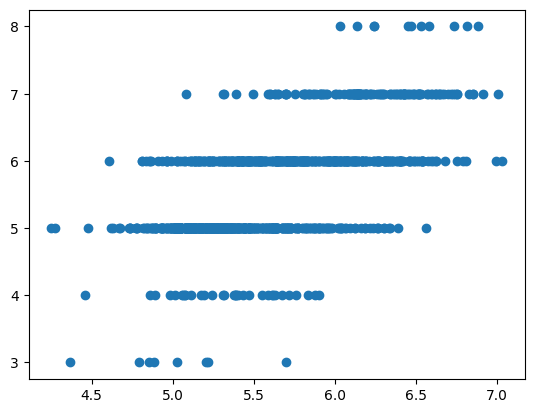

In [213]:
# predicted targets of training set using fitted model
y_train_pred = model.predict(X_train)

#plotting actual training target vs predicted values
plt.scatter(y_train_pred,y_train)

We can see that on the y axis, since all our actual target values are integers, the points lie on well defined horizontal lines. On the x axis, we are plotting against the predicted target values. Looking at the mean/median for each real target value, the model seems to have most success with predicting a value of six, whereas at more extreme values like 3 and 8 the model predicts values closer to the center.

## e)

In [214]:
# predicted targets of testing set using fitted model
y_pred = model.predict(X_test)

print(f'RMSE of Training Set = {RMSE(y_train, y_train_pred)}')
print(f'RMSE of Testing Set = {RMSE(y_test, y_pred)}')

RMSE of Training Set = 0.6389134931707996
RMSE of Testing Set = 0.6521075142485163


## f)

In [255]:
step_sizes = [0.01,0.005,0.001,0.0005]
max_iterations = 100000
epsilon = 1e-18

def LeastMeanSquares(X, y, step_size, max_iterations, epsilon): #function implementing least mean squares algorithm
    # add bias to X
    X = concat_ones(X)
    #randomly initialize weights
    w = np.random.rand(X.shape[1])
    #combine X and y for shuffling
    A = np.hstack((X, y[:, np.newaxis]))
    
    for i in range(max_iterations): #stochastic gradient descent
        n = A.shape[0]
        #reset index every epoch
        j = i % n   
        
        #reshuffle A every epoch
        if i % n == 0:
            np.random.shuffle(A)
        
        #split back into X and y
        X = A[:, :-1]
        X = X
        y = A[:,-1]

        #calculate error
        y_pred = X[j,:] @ w
        error = y[j] - y_pred
        
        #update weights
        gradient = X[j,:] * error
        w += step_size * gradient
        
        #stopping condition
        if np.linalg.norm(X[j,:]*error, 2) <= epsilon:
            break
        
    return w

In [256]:
for step in step_sizes:
    pred = concat_ones(X_val) @ LeastMeanSquares(X_train, y_train, step, max_iterations, epsilon)
    print(f'RMSE of Validation Set = {RMSE(y_val, pred)}')

RMSE of Validation Set = 0.6938697845841917
RMSE of Validation Set = 0.6998463261238033
RMSE of Validation Set = 0.7405436457762862
RMSE of Validation Set = 0.7737251018841768


In [254]:
opt_step = 0.01
pred = concat_ones(X_test) @ LeastMeanSquares(X_train, y_train, opt_step, max_iterations, epsilon)
print(f'RMSE of Test Set = {RMSE(y_test, pred)}')

RMSE of Test Set = 0.6532384129492199
